In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [24]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [25]:
train_set = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding="latin1")
test_set = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding ="latin1")

In [26]:
unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]

train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [27]:
train_set["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [28]:
positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive


In [29]:
negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()

Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
9,"For corona prevention,we should stop to buy th...",Negative
20,with 100 nations inficted with covid 19 th...,Extremely Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative


In [30]:
neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

Neutral    7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral
10,All month there hasn't been crowding in the su...,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral


In [31]:
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

negatives.head()

,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",0
9,"For corona prevention,we should stop to buy th...",0
20,with 100 nations inficted with covid 19 th...,0
24,@10DowningStreet @grantshapps what is being do...,0
26,In preparation for higher demand and a potenti...,0


In [32]:
data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

In [33]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
cleanedData = []


lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    

    text = re.sub(r'http\S+', '', text)
    

    text = re.sub("[^a-zA-Z0-9]"," ",text)
    

    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    

    text = [word for word in text if word not in swords]
    
    text = " ".join(text)
    
    cleanedData.append(text)

In [34]:
cleanedData[1]

'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak'

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleanedData)
vocab_size = len(tokenizer.word_index) + 1
print('vocabulary size:{}'.format(vocab_size))
max_len = 30
print('max length of input:{}'.format(max_len))
sequence = tokenizer.texts_to_sequences(cleanedData)

x = pad_sequences(sequence, max_len, padding='post')
print('example x:{}'.format(x[4]))

vocabulary size:53598
max length of input:30
example x:[  554     8     5    28  1303   548     3     2  2826 10433 10434 21686
   989    71   896     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]


In [36]:
def check(predict):
    if(predict[0][0]) == 1.:
        print("Negative")
    elif (predict[0][1]) == 1.:
        print("Netural")
    else:
        print("Postitive")

In [37]:

from tensorflow.keras import layers, Sequential

max_features = 1000
embedding_dim = 16

BATCH_SIZE = 64
EPOCHS = 4
embedding_dim=16
model = Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    layers.Bidirectional(layers.GRU(256, return_sequences=True)),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='sigmoid')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 16)            857568    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 512)           420864    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, data["Sentiment"], epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/4
633/633 [==============================] - 69s 110ms/step - loss: 0.7215 - accuracy: 0.6903 - val_loss: 0.6940 - val_accuracy: 0.7371
Epoch 2/4
633/633 [==============================] - 68s 108ms/step - loss: 0.3854 - accuracy: 0.8720 - val_loss: 0.5550 - val_accuracy: 0.8147
Epoch 3/4
633/633 [==============================] - 69s 109ms/step - loss: 0.2642 - accuracy: 0.9156 - val_loss: 0.4907 - val_accuracy: 0.8583
Epoch 4/4
633/633 [==============================] - 70s 111ms/step - loss: 0.2037 - accuracy: 0.9341 - val_loss: 0.6330 - val_accuracy: 0.8205


In [39]:
check1 = ["Man how do we even thank corona these online classes are so much better"]
check1 = tokenizer.texts_to_sequences(check1)
check1 = pad_sequences(check1, maxlen=max_len, padding='post')

check2 =["Man corona is one crazy disease ngl"]
check2 = tokenizer.texts_to_sequences(check2)
check2 = pad_sequences(check2, maxlen=max_len, padding='post')

In [40]:
result = model.predict(check1)
result2 = model.predict(check2)

In [41]:
print(check(result.round())+check(result2.round()))

Postitive
Negative


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

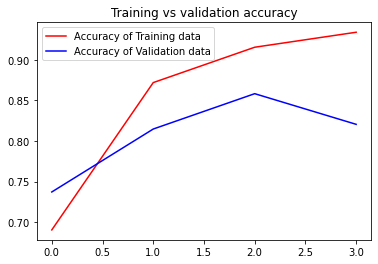

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

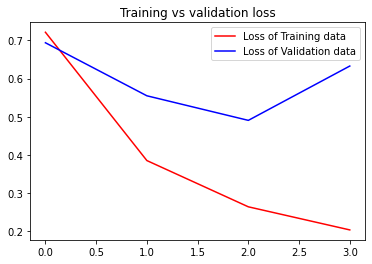

<Figure size 432x288 with 0 Axes>

In [43]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()